In [19]:
from astropy.coordinates import match_coordinates_sky
from astropy.coordinates import SkyCoord
from astropy.io import ascii
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


catal=ascii.read('/data3/yunyi/SOAO/code/M101_PS1_trial_R.csv')
ra = catal['raMean']
dec = catal['decMean']
c = SkyCoord(ra, dec, frame='icrs', unit='deg')

ob = ascii.read('/data3/yunyi/SOAO/code/M101_SOAO_mean_trial_2.cat')    
ALPHA_J2000 = ob['ALPHA_J2000']
DELTA_J2000 = ob['DELTA_J2000']
flag=ob['FLAGS']
o = SkyCoord(ALPHA_J2000, DELTA_J2000, frame='icrs', unit='deg')


indx, sep, _ = o.match_to_catalog_sky(c)

P=[]

for i in range(len(o)):
    if sep.arcsec[i]<1:
        if flag[i]<10:
            P.append(i)
            
mag_ob = np.array(ob['MAG_AUTO'])
mag_catal = np.array(catal['R1'])
magErr = np.array(ob['MAGERR_AUTO'])
gErr = np.array(catal['gMeanKronMagErr'])
rErr = np.array(catal['rMeanKronMagErr'])

#zero point & zero point error calculation 
zp = []
zpE = []
for i in range(len(mag_ob)):
    u=indx[i]
    x = float(mag_catal[u])-float(mag_ob[i])
    e = np.sqrt(magErr[i]**2 + gErr[u]**2 + rErr[u]**2)
    zp.append(x)
    zpE.append(e)
    
    
mag_c_new=[]
zp_new=[]
zpE_new=[]
for i in P:
    u=indx[i]
    if 100>zp[i]>0:
        #if zpE[i]<0.1:
            mag_c_new.append(mag_catal[u])
            zpE_new.append(zpE[i])
            zp_new.append(zp[i])
            



(array([  1.,   0.,   2.,   2.,  13.,  47., 157.,  26.,  11.,   3.]),
 array([20.76604317, 21.54484309, 22.323643  , 23.10244292, 23.88124283,
        24.66004275, 25.43884266, 26.21764258, 26.99644249, 27.77524241,
        28.55404232]),
 <BarContainer object of 10 artists>)

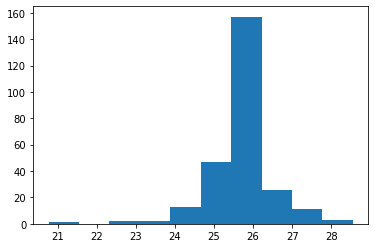

In [20]:
plt.hist(zp_new)

In [16]:
a=zp_new

In [9]:
b=zp_new

In [21]:
c=zp_new

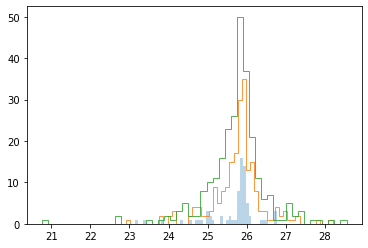

In [34]:
plt.hist(a, bins=50, alpha=0.3, histtype='stepfilled')
plt.hist(b, bins=50, alpha=0.8, histtype='step')
plt.hist(c, bins=50,  alpha=0.8, histtype='step')
plt.show()